# Homework 1: Professionalism & Reproducibility
## Data Analysis

The goal of this assignment is to construct, analyze, and publish a dataset of monthly article traffic for a selected set of pages from English Wikipedia from July 1, 2015 through September 30, 2024. We make sure to follow the best practices for open scientific research as mentioned in chapters "Assessing Reproducibility" and "The Basic Reproducible Workflow Template" of "The Practice of Reproducible Research: Case Studies and Lessons from the Data-Intensive Sciences" publication.

This notebook talks about "Data Analysis". It is the second and final step in this assignemnt. Here we have a visual data analysis of pageview data for Wikipedia rare disease articles. The goal is to explore trends in page requests for both desktop and mobile access over a given time period (07/01/2015 - 09/30/2024). The dataset includes monthly pageviews for each article, categorized by access type.

Particularly, we will create these three visualizations:
- **Maximum and Minimum Average:** A time series graph displaying the highest and lowest average page requests for both desktop and mobile access.
- **Top 10 Peak Page Views:** A time series graph showcasing the top 10 articles with the highest peak page views for desktop and mobile access.
- **Fewest Months of Data:** A time series graph illustrating the 10 articles with the fewest months of available data for both desktop and mobile access.

Every step in this notebook is documented to ensure transparency and reproducibility.

### 1. Import required Libraries and Dependencies

In [128]:
# standard python modules
import json

# not standard modules, need to be installed with pip/pip3 if not done earlier
import pandas as pd
import matplotlib.pyplot as plt

### 2. Load and transform data

Load the rare-disease_monthly_desktop and rare-disease_monthly_mobile datasets that were generated in the `step1_data-acquisition.ipynb` notebook. Further, convert the data (currently in dictionary format) into DataFrame type and prepare additional column(s) (for example, we only require 'date') for further analysis.

In [129]:
# Function to transform data (which is of dict type) into a dataframe
def transform_data(data_dict):
    """
    Transform a dictionary containing article view data into a pandas DataFrame.

    Args:
        data_dict (dict): A dictionary where each key is an article title, and each value is a list of dictionaries containing 'timestamp' and 'views' for that article.

    Returns:
        pd.DataFrame: A DataFrame containing three columns: 'article', 'timestamp', and 'views', where each row corresponds to a single entry of view data for an article.
    """
    records = []
    for article, views in data_dict.items():
        for entry in views:
            records.append({'article': article,
                            'timestamp': entry['timestamp'],
                            'views': entry['views']})
    return pd.DataFrame(records)

#### 2.1 rare-disease_monthly_desktop data

In [130]:
# load data
with open("../data/generated_data/rare-disease_monthly_desktop_201507-202409.json", 'r') as file:
    desktop_data_dict = json.load(file)

# convert the data (which is currently in dict format) to dataframe format
desktop_df = transform_data(desktop_data_dict)

# get date from the 'timestamp' variable
desktop_df['date'] = pd.to_datetime(desktop_df['timestamp'], format='%Y%m%d%H')
desktop_df.head()

,article,timestamp,views,date
0,18p,2015070100,22,2015-07-01
1,18p,2015080100,13,2015-08-01
2,18p,2015090100,12,2015-09-01
3,18p,2015100100,9,2015-10-01
4,18p,2015110100,6,2015-11-01


#### 2.2 rare-disease_monthly_mobile data

In [131]:
# load data
with open("../data/generated_data/rare-disease_monthly_mobile_201507-202409.json", 'r') as file:
    mobile_data_dict = json.load(file)

# convert the data (which is currently in dict format) to dataframe format
mobile_df = transform_data(mobile_data_dict)

# get date from the 'timestamp' variable
mobile_df['date'] = pd.to_datetime(mobile_df['timestamp'], format='%Y%m%d%H')
mobile_df.head()

,article,timestamp,views,date
0,18p,2015070100,2,2015-07-01
1,18p,2015080100,1,2015-08-01
2,18p,2015090100,2,2015-09-01
3,18p,2015100100,10,2015-10-01
4,18p,2015110100,2,2015-11-01


### 3. Visualize the Data
Data visualization is all about showing information and data in a visual way (for example, using charts and graphs). This makes it easier to understand complex data. Here, we will create three specific visualizations to analyze the page views for rare disease articles.

#### 3.1 Maximum Average and Minimum Average
In this section, we will create a line chart that shows the articles with the highest and lowest average page views for both desktop and mobile access over the entire time period.

Let us first analyze the page view data for articles based on their access types (desktop and mobile) and prepare it for visualization. 

In [132]:
# Calculate average views based on the access type
avg_desktop = desktop_df.groupby('article')['views'].mean()
avg_mobile = mobile_df.groupby('article')['views'].mean()
print("Desktop: \n", avg_desktop.head())
print("\nMobile: \n", avg_mobile.head())

Desktop: 
 article
18p                                   4.495495
18p-                                166.855856
2006 in Africa                       87.531532
2007 in Africa                       84.450450
2009 swine flu pandemic vaccine    2372.907407
Name: views, dtype: float64

Mobile: 
 article
18p                                   3.081081
18p-                                256.306306
2006 in Africa                       15.729730
2007 in Africa                       11.684685
2009 swine flu pandemic vaccine    3854.685185
Name: views, dtype: float64


In [133]:
# Find the article with max and min requests for each of the access type
max_desktop_article = avg_desktop.idxmax()
print("Desktop Article with Maximum Requests: ", max_desktop_article)
min_desktop_article = avg_desktop.idxmin()
print("Desktop Article with Minimum Requests: ", min_desktop_article)
max_mobile_article = avg_mobile.idxmax()
print("Mobile Article with Maximum Requests: ", max_mobile_article)
min_mobile_article = avg_mobile.idxmin()
print("Mobile Article with Minimum Requests: ", min_mobile_article)

Desktop Article with Maximum Requests:  Black Death
Desktop Article with Minimum Requests:  Filippi Syndrome
Mobile Article with Maximum Requests:  Black Death
Mobile Article with Minimum Requests:  Filippi Syndrome


In [134]:
# Prepare data for plotting (Include only the rows corresponding to the article with the maximum/minimum average views)
filtered_max_desktop = desktop_df[desktop_df['article'] == max_desktop_article]
max_desktop_views = filtered_max_desktop.set_index('date')['views']

filtered_min_desktop = desktop_df[desktop_df['article'] == min_desktop_article]
min_desktop_views = filtered_min_desktop.set_index('date')['views']

filtered_max_mobile = mobile_df[mobile_df['article'] == max_mobile_article]
max_mobile_views = filtered_max_mobile.set_index('date')['views']

filtered_min_mobile = mobile_df[mobile_df['article'] == min_mobile_article]
min_mobile_views = filtered_min_mobile.set_index('date')['views']

Let us now have the visual. By plotting this information as a time series, we can see how page views change over time for these articles.

The graph includes four lines:
- Red line for the article with the highest average views on desktop.
- Orange line for the article with the lowest average views on desktop.
- Green line for the article with the highest average views on mobile.
- Blue line for the article with the lowest average views on mobile.

We can now quickly see how these articles perform over time and highlight any major changes in user engagement on different devices.

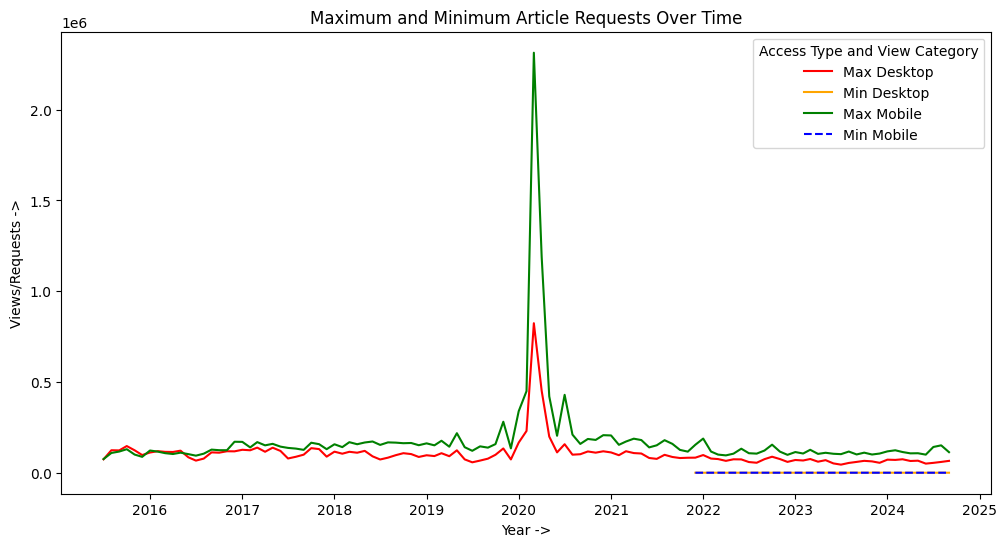

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(max_desktop_views.index, max_desktop_views.values, label='Max Desktop', color='red')
plt.plot(min_desktop_views.index, min_desktop_views.values, label='Min Desktop', color='orange')
plt.plot(max_mobile_views.index, max_mobile_views.values, label='Max Mobile', color='green')
plt.plot(min_mobile_views.index, min_mobile_views.values, label='Min Mobile', color='blue', linestyle='--')
plt.title('Maximum and Minimum Article Requests Over Time')
plt.xlabel('Year ->')
plt.ylabel('Views/Requests ->')
plt.legend(title='Access Type and View Category')
plt.savefig('../generated_visuals/plot1_linearscale_maximum_average_and_minimum_average.png')
plt.show()

**Observations:**

Above, we can see following articles based on their average page requests:
- Desktop Article with Maximum Requests: Black Death
- Desktop Article with Minimum Requests: Filippi Syndrome
- Mobile Article with Maximum Requests: Black Death
- Mobile Article with Minimum Requests: Filippi Syndrome

Filippi Syndrome article received very low requests and we cannot really observe the trends in the data over time in a linear scale. To better address this, let us visualize it on a logarithmic scale and minimum requests individually on a linear scale.

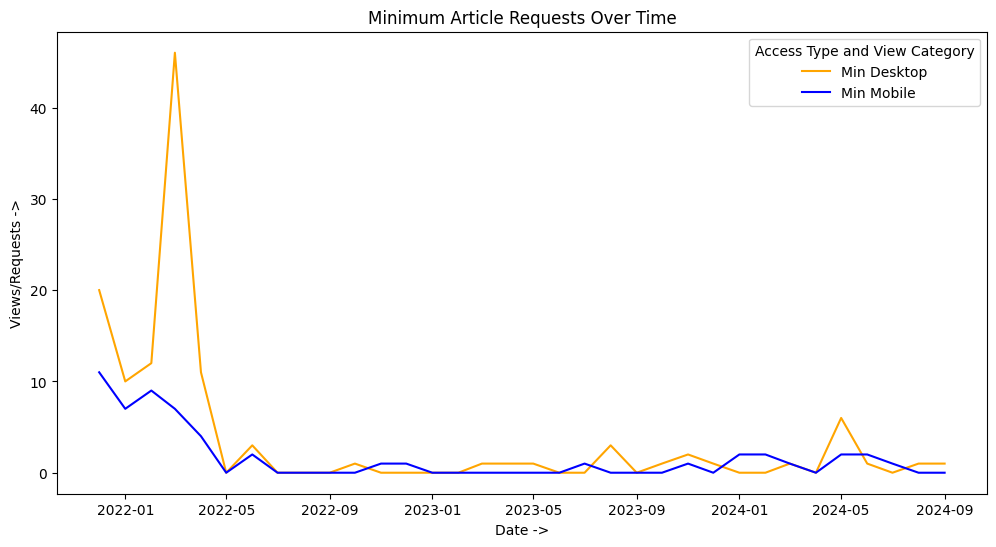

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(min_desktop_views.index, min_desktop_views.values, label='Min Desktop', color='orange')
plt.plot(min_mobile_views.index, min_mobile_views.values, label='Min Mobile', color='blue')
plt.title('Minimum Article Requests Over Time')
plt.xlabel('Date ->')
plt.ylabel('Views/Requests ->')
plt.legend(title='Access Type and View Category')
plt.show()

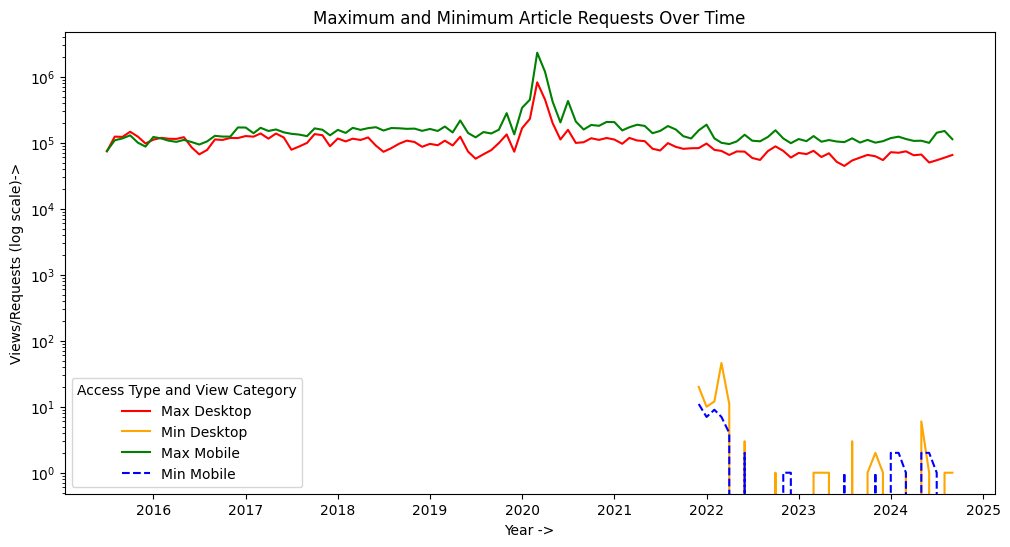

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(max_desktop_views.index, max_desktop_views.values, label='Max Desktop', color='red')
plt.plot(min_desktop_views.index, min_desktop_views.values, label='Min Desktop', color='orange')
plt.plot(max_mobile_views.index, max_mobile_views.values, label='Max Mobile', color='green')
plt.plot(min_mobile_views.index, min_mobile_views.values, label='Min Mobile', color='blue', linestyle='--')
plt.title('Maximum and Minimum Article Requests Over Time')
plt.xlabel('Year ->')
plt.yscale('log')
plt.ylabel('Views/Requests (log scale)->')
plt.legend(title='Access Type and View Category')
plt.savefig('../generated_visuals/plot1_logscale_maximum_average_and_minimum_average.png')
plt.show()

**Observations:**
- The number of views peaked between 2020-2021, likely due to the onset of COVID-19.
- During the peak months, there were almost 2x mobile views than the desktop views (especially for the Filippi Syndrome article).


#### 3.2 Top 10 Peak Page Views 
In this section, we will visualize the Top 10 Peak Page Views for articles accessed via desktop and mobile platforms. Our goal is to identify the articles that received the highest number of page views during their peak month and display their performance over time. It helps us understand the audience behavior over time.

We first find the month with the highest views for each article and then extract the top 10 articles with the highest peak views for both desktop and mobile access.

In [138]:
# Find peak desktop views for each article
peak_desktop = desktop_df.loc[desktop_df.groupby('article')['views'].idxmax()].nlargest(10, 'views')
peak_desktop

,article,timestamp,views,date
133335,Pandemic,2020030100,1046521,2020-03-01
21093,Black Death,2020030100,823649,2020-03-01
32384,Chloroquine,2020030100,440897,2020-03-01
136683,Pfeiffer syndrome,2016040100,408153,2016-04-01
63407,Fibrodysplasia ossificans progressiva,2015100100,313785,2015-10-01
22816,Botulism,2017060100,302593,2017-06-01
153917,Robert Koch,2017120100,254656,2017-12-01
161904,Smallpox,2020030100,249177,2020-03-01
35464,Cleidocranial dysostosis,2017110100,191115,2017-11-01
10004,Amyotrophic lateral sclerosis,2018030100,186945,2018-03-01


In [139]:
# Find peak mobile views for each article
peak_mobile = mobile_df.loc[mobile_df.groupby('article')['views'].idxmax()].nlargest(10, 'views')
peak_mobile

,article,timestamp,views,date
21093,Black Death,2020030100,2313741,2020-03-01
133335,Pandemic,2020030100,2276916,2020-03-01
136683,Pfeiffer syndrome,2016040100,777886,2016-04-01
32384,Chloroquine,2020030100,777537,2020-03-01
166094,Stiff-person syndrome,2024070100,677927,2024-07-01
140211,Porphyria,2023050100,585872,2023-05-01
70534,Glioblastoma,2020110100,562173,2020-11-01
35464,Cleidocranial dysostosis,2017110100,485195,2017-11-01
22816,Botulism,2017060100,470273,2017-06-01
94159,Kawasaki disease,2020050100,448512,2020-05-01


Now let us plot.
- Solid line refers to an article viewed on desktop.
- dashed line refers to an article viewed on mobile.

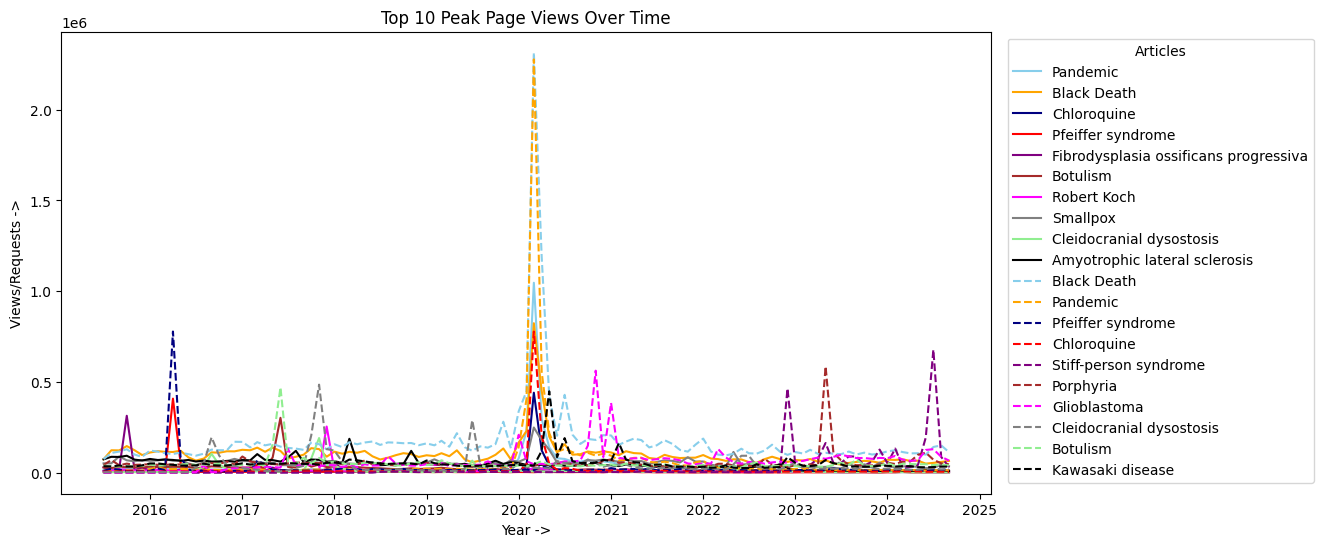

In [140]:
colors = ['skyblue', 'orange', 'navy', 'red', 'purple', 'brown', 'magenta', 'gray', 'lightgreen', 'black']

plt.figure(figsize=(12, 6))

# plot desktop articles
for idx, article in enumerate(peak_desktop['article']):
    plt.plot(desktop_df[desktop_df['article'] == article].set_index('date')['views'], label=article, color=colors[idx % len(colors)])

# plot mobile articles
for idx, article in enumerate(peak_mobile['article']):
    plt.plot(mobile_df[mobile_df['article'] == article].set_index('date')['views'], label=article, color=colors[idx % len(colors)], linestyle='--')

plt.title('Top 10 Peak Page Views Over Time')
plt.xlabel('Year ->')
plt.ylabel('Views/Requests ->')
plt.legend(title='Articles', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig('../generated_visuals/plot2_linearscale_top_10_peak_page_views.png')
plt.show()

Due to significant variation in the number of views for each article, we cannot really observe the trends in the data over time in a linear scale. To better address this, let us visualize it on a logarithmic scale.

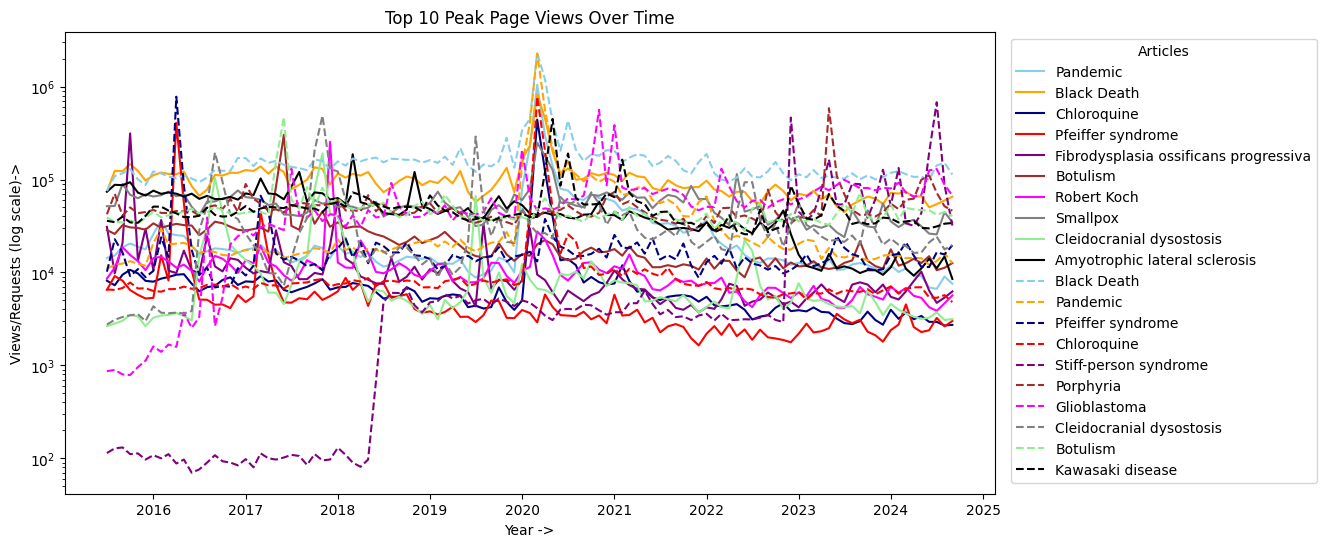

In [141]:
plt.figure(figsize=(12, 6))

# plot desktop articles
for idx, article in enumerate(peak_desktop['article']):
    plt.plot(desktop_df[desktop_df['article'] == article].set_index('date')['views'], label=article, color=colors[idx % len(colors)])

# plot mobile articles
for idx, article in enumerate(peak_mobile['article']):
    plt.plot(mobile_df[mobile_df['article'] == article].set_index('date')['views'], label=article, color=colors[idx % len(colors)], linestyle='--')

plt.title('Top 10 Peak Page Views Over Time')
plt.xlabel('Year ->')
plt.yscale('log')
plt.ylabel('Views/Requests (log scale)->')
plt.legend(title='Articles', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig('../generated_visuals/plot2_logscale_top_10_peak_page_views.png')
plt.show()

**Observations:**
- Majority of the peaks correspond to article views on mobile (represented as --). 
- In a given month, "Pandemic" has the largest desktop views and "Black Death" has the highest number of mobile views. They are both the most viewed articles especially between 2020-2021.

#### 3.3 Fewest Months of Data 

In this section, we will visualize 10 articles that have the least amount of available data (articles potentially having data for only a month). This can help in deciding which articles may need more data collection or attention. 

Firstly, let's identify which desktop and mobile articles have the least amount of data available

In [142]:
# Count months of data for articles viewed on desktop
months_desktop = desktop_df.groupby('article')['date'].nunique()

# Find 10 desktop articles with fewest months of data
least_viewed_months_desktop = months_desktop.nsmallest(10)
print("Desktop articles with fewest months of data: ")
least_viewed_months_desktop

Desktop articles with fewest months of data: 


article
Retinal vasculopathy with cerebral leukoencephalopathy and systemic manifestations    33
Filippi Syndrome                                                                      34
COVID-19 vaccine misinformation and hesitancy                                         37
CDKL5 deficiency disorder                                                             40
Joseph Vinetz                                                                         40
Bradley Monk                                                                          41
Deaf plus                                                                             41
Hemolytic jaundice                                                                    41
Spongy degeneration of the central nervous system                                     41
Ellis–Van Creveld syndrome                                                            44
Name: date, dtype: int64

In [143]:
# Count months of data for articles viewed on mobile
months_mobile = mobile_df.groupby('article')['date'].nunique()

# Find 10 mobile articles with fewest months of data
least_viewed_months_mobile = months_mobile.nsmallest(10)
print("Mobile articles with fewest months of data: ")
least_viewed_months_mobile

Mobile articles with fewest months of data: 


article
Retinal vasculopathy with cerebral leukoencephalopathy and systemic manifestations    33
Filippi Syndrome                                                                      34
COVID-19 vaccine misinformation and hesitancy                                         37
CDKL5 deficiency disorder                                                             40
Joseph Vinetz                                                                         40
Bradley Monk                                                                          41
Deaf plus                                                                             41
Hemolytic jaundice                                                                    41
Spongy degeneration of the central nervous system                                     41
Ellis–Van Creveld syndrome                                                            44
Name: date, dtype: int64

Now let us plot.
- Solid line refers to an article viewed on desktop.
- dashed line refers to an article viewed on mobile.

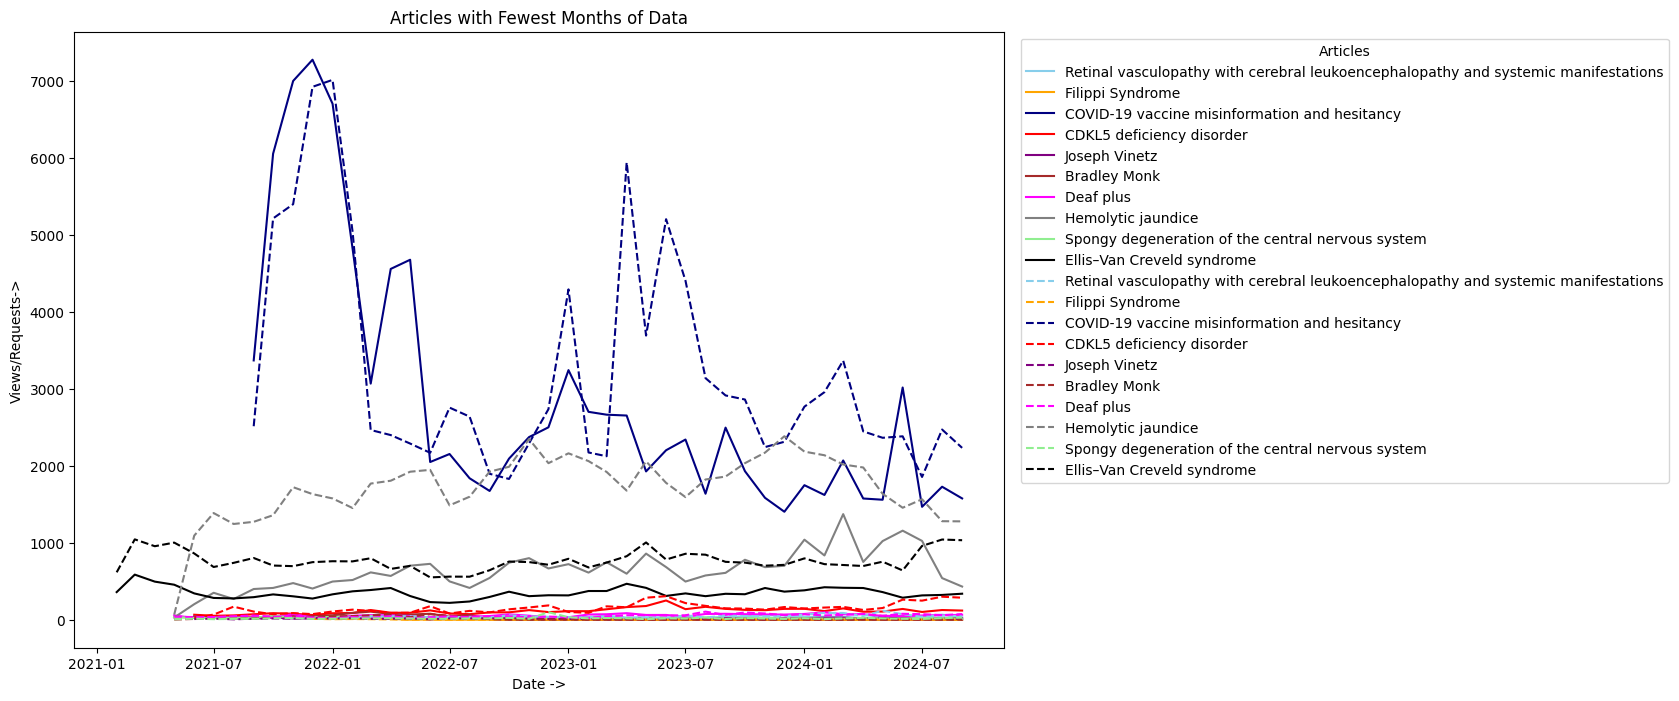

In [144]:
plt.figure(figsize=(12, 8))

# Plot desktop articles
for idx, article in enumerate(least_viewed_months_desktop.index):
    plt.plot(desktop_df[desktop_df['article'] == article].set_index('date')['views'], label=article, color=colors[idx % len(colors)])

# Plot mobile articles
for idx, article in enumerate(least_viewed_months_mobile.index):
    plt.plot(mobile_df[mobile_df['article'] == article].set_index('date')['views'], label=article, color=colors[idx % len(colors)], linestyle='--')

plt.title('Articles with Fewest Months of Data')
plt.xlabel('Date ->')
plt.ylabel('Views/Requests->')
plt.legend(title='Articles', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig('../generated_visuals/plot3_linearscale_fewest_months_of_data.png.png')
plt.show()

Due to significant variation in the number of views for each article, we cannot really observe the trends in the data over time in a linear scale. To better address this, let us visualize it on a logarithmic scale.

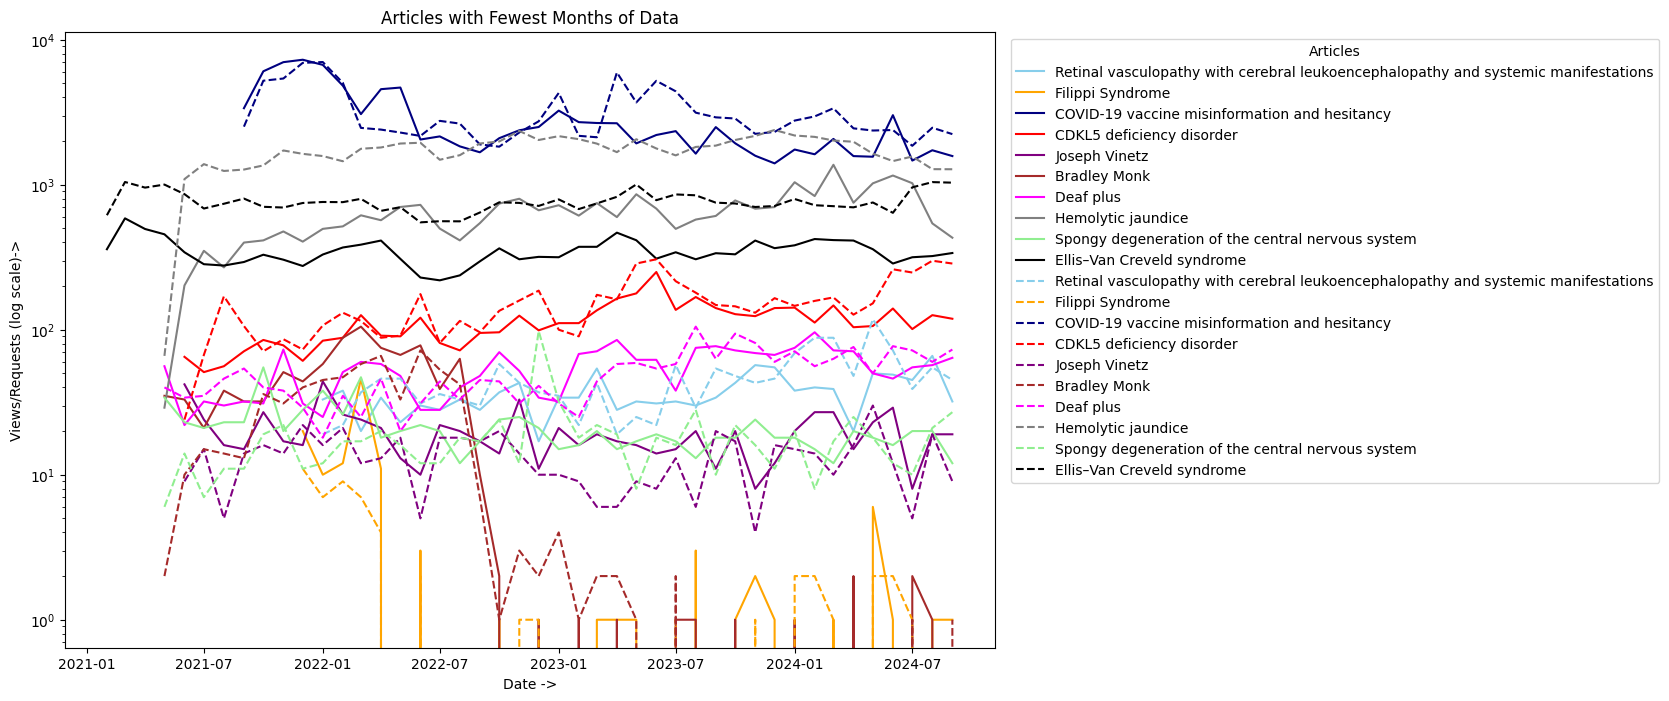

In [145]:
plt.figure(figsize=(12, 8))

# Plot desktop articles
for idx, article in enumerate(least_viewed_months_desktop.index):
    plt.plot(desktop_df[desktop_df['article'] == article].set_index('date')['views'], label=article, color=colors[idx % len(colors)])

# Plot mobile articles
for idx, article in enumerate(least_viewed_months_mobile.index):
    plt.plot(mobile_df[mobile_df['article'] == article].set_index('date')['views'], label=article, color=colors[idx % len(colors)], linestyle='--')

plt.title('Articles with Fewest Months of Data')
plt.xlabel('Date ->')
plt.yscale('log')
plt.ylabel('Views/Requests (log scale)->')
plt.legend(title='Articles', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig('../generated_visuals/plot3_logscale_fewest_months_of_data.png.png')
plt.show()

**Observations:**
- In general, compared to the last 2 plots (which had many views in $10^6$), articles with the least amount of data have lesser number of views. There is an exception for articles like, "COVID-19 vaccine misinformation and hesitancy" and "Hemolytic jaundice." which has like $10^4$~ views.
- It can also be observed that most of the articles here are viewed more on the mobile compared to desktop starting 2023.

### 4. Conclusion

In this notebook, we successfully visualized the data and found articles with both high and low engagement and patterns in how users behave on desktop and mobile platforms. We noticed some interesting trends, especially for articles related to COVID-19 and during the time the pandemic peaked. It is always a good open scientific research practice to have more domain knowledge (of the articles specifically here) to understand these trends better. 